# DS 3000 - Assignment 11

**Student Name**: Ryan Tietjen

**Date**: 03/31/24


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

(5 pts) Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')

print(df.shape)
print(df.describe())

(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000         

-As shown above, this dataset includes 768 rows and 9 features.

-Since each feature has a count of 768, this indicates that there are no MISSING values in the dataset (though there still may be null values). 

-That being said, some features include values that should not be possible. For instance, a glucose, blood pressure, skin thickness, insulin, and BMI all have a min value of 0, which should not be possible for any individual. 

-The ages vary from 21-81, which shows that this dataset contains a wide range of ages.

-The mean outcome is ~0.35, which suggests that roughly 35% of the data (If we had more information about the rate of diabetes in the population of the Prima Indians, we could compare these values to determine if this sample is representative of the population)

## Question 2: 

(5 pts) Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.

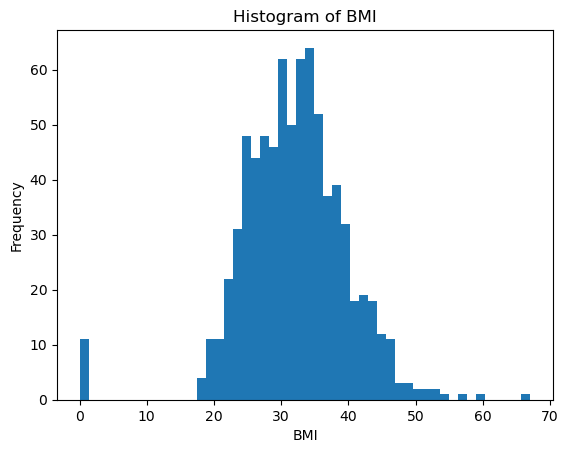

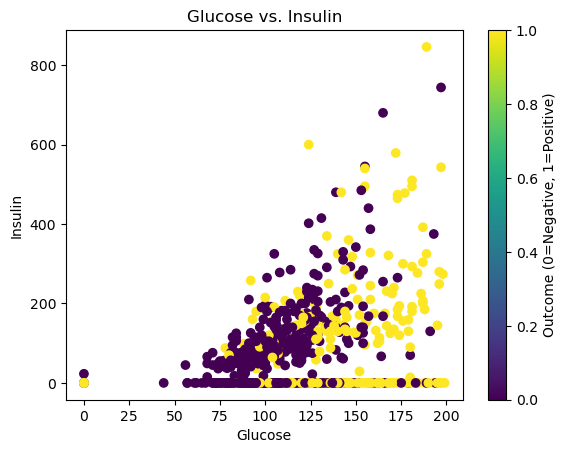

In [3]:
plt.hist(df['BMI'], bins=50)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

plt.scatter(df['Glucose'], df['Insulin'], c=df['Outcome'])
plt.title('Glucose vs. Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.colorbar(label='Outcome (0=Negative, 1=Positive)')
plt.show()

The first visualization is a histogram of BMI. It appears that BMI follows a normal distribution. Furthermore, there appears to be roughly 10 values where the BMI is 0. This is not possible and these values should be removed.

The next visualization is a scatterplot of Glucose vs. Insulin. As seen above, insulin and glucose display a moderate positive correlation. Furthermore, as insulin and glucose tend to increase, diabetes appears to become more likely.

## Question 3:

(5 pts) Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).

(392, 9)


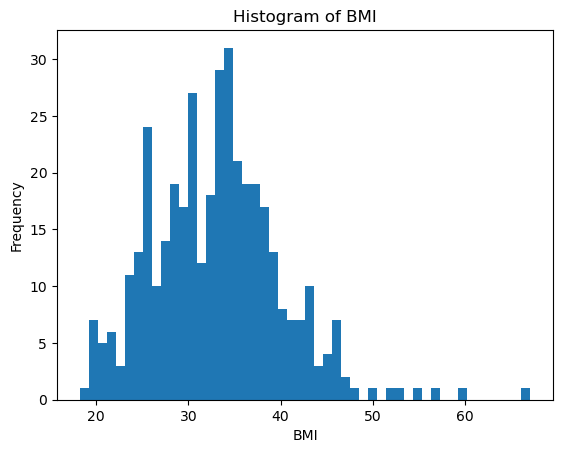

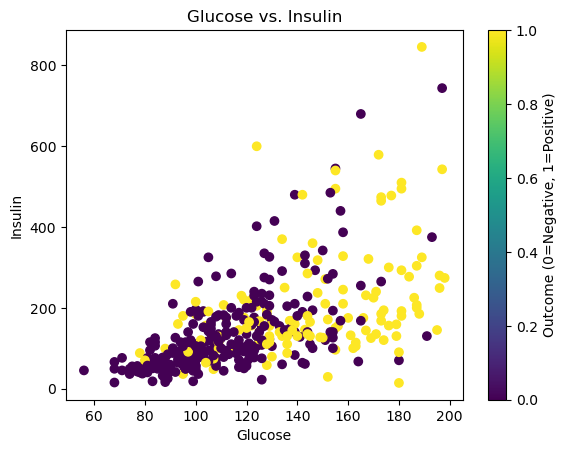

In [4]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

df = df.dropna()

print(df.shape)

plt.hist(df['BMI'], bins=50)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

plt.scatter(df['Glucose'], df['Insulin'], c=df['Outcome'])
plt.title('Glucose vs. Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.colorbar(label='Outcome (0=Negative, 1=Positive)')
plt.show()

## Question 4:

(10 pts) Partition the data into train/test sets. After which, perform the following:
encode any categorical data
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31, stratify=y)

#There is no need to encode Outcome since it is basically already encoded

scaler = StandardScaler()
scaler.fit(X_train[['Pregnancies', 'Glucose', 'BloodPressure',
                    'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']])

X_train[['Pregnancies', 'Glucose',
         'BloodPressure', 'SkinThickness',
         'Insulin','BMI',
         'DiabetesPedigreeFunction', 'Age']] = scaler.transform(X_train[['Pregnancies', 'Glucose',
                                                                         'BloodPressure','SkinThickness',
                                                                         'Insulin','BMI',
                                                                         'DiabetesPedigreeFunction', 'Age']])

X_test[['Pregnancies', 'Glucose',
         'BloodPressure', 'SkinThickness',
         'Insulin','BMI',
         'DiabetesPedigreeFunction', 'Age']] = scaler.transform(X_test[['Pregnancies', 'Glucose',
                                                                         'BloodPressure','SkinThickness',
                                                                         'Insulin','BMI',
                                                                         'DiabetesPedigreeFunction', 'Age']])

print(X_train.head())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
526    -0.710509 -0.810685      -0.528874      -0.995522 -0.587678 -2.100253   
544    -0.710509 -1.107119       0.651324      -0.048393 -0.640328 -0.173038   
597    -0.710509 -1.074182      -3.900866      -0.995522 -1.087860 -0.759581   
110    -0.104031  1.626660       0.145525       0.330458 -0.122596  0.008512   
760    -0.407270 -1.107119      -1.034673      -0.332532 -1.166836 -0.675789   

     DiabetesPedigreeFunction       Age  
526                 -0.617553 -0.970378  
544                 -0.426499 -0.156967  
597                  0.135081 -0.970378  
110                 -0.907027 -0.665349  
760                  0.734293 -0.868702  


## Question 5:

(20 pts) Build the model that predicts the target variable. Ensure that you:
Instantiate the correct SVM model, train and evaluate it.
Use GridSearchCV to tune at least two hyperparameters.**
Perform cross validation.
**You'll need to read the documentation of the SVM algorithm to identify the hyperparameters.
Display: 1) the best model/parameters and 2) the best score that was obtained.

In [6]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(y_pred)

print("Before tuning:", svm.score(X_test, y_test))

params = {
    'C': [0.1, 1, 5, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 5],
}

svm_grid = GridSearchCV(svm, params, cv=5)
svm_grid.fit(X_train, y_train)

print("Best params:", svm_grid.best_params_)
print("Best score:", svm_grid.best_score_)

best_model = svm_grid.best_estimator_
y_pred = svm_grid.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy of the best model:", test_accuracy)

[1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0]
Before tuning: 0.7542372881355932
Best params: {'C': 1, 'gamma': 0.01}
Best score: 0.7704377104377105
Test set accuracy of the best model: 0.7796610169491526


## Question 6:

(5 pts) Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model. Did it accurately predict the target? Do you think the prediction from this model is useful and would you advocate for its use in the medical industry?

The best score from GridSearchCV is around 0.770, which is a slight improvement over the pre-tuning score of .754. Hence, hyperparameter tuning has provided a benefit over the default settings. 

The accuracy on the test set is roughly 0.780, indicating good generalization. This suggests that the model is not overfitting significantly.

The accuracy of roughly 78% on the test set is decent, indicating that the model wa1s able to accurately predict the target the majority of the time. However, this model would likely not be useful for use in the medical industry. This model uses a person's attributes to predict diabetes, meaning that the model is merely looking for correlations. While this might be useful for predicting what portion of a large number of people have diabetes, the case is much different for individual diagnoses. When diagnosing an individual with diabetes, medical professionals must look at the cause of diabetes, rather than factors that correlate with it. This would still be the case even if the model was more accurate. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
